In [141]:
import requests
from IPython.display import HTML
from bs4 import BeautifulSoup
import re
import pandas as pd
import scrape_insta
import json.decoder as decoder
import time
from selenium import webdriver

In [ ]:
import time
import pandas as pd
import re
import selenium

In [153]:
import shopify_scrape
%autoreload

In [ ]:
brow = webdriver.PhantomJS()

In [3]:
user ='driftbikinis@gmail.com'
password = 'Stayrad_22'

In [112]:
df = pd.read_csv('web_trafficjan_sept2017.csv')

In [113]:
df.fillna(0, inplace=True)

In [114]:
traffic_dict = df.to_dict(orient='list')

In [121]:
new_dict = reformat_dictionary(traffic_dict)

In [126]:
df3 = pd.DataFrame(new_dict)
df3.transpose()

In [129]:
df3.transpose()

,Direct,Email,Facebook,Iconosquare,Instagram,Pintrest,Search,Unknown
2015-12-07,3,0,0,0,0,0,0,0
2015-12-08,8,0,0,0,0,0,1,0
2015-12-09,8,0,0,0,0,0,0,0
2015-12-10,29,0,160,0,0,0,0,0
2015-12-11,10,0,73,0,0,0,0,0
2015-12-12,14,0,29,0,0,0,0,1
2015-12-13,6,0,5,0,0,0,0,0
2015-12-14,8,0,2,0,0,0,1,0
2015-12-15,14,0,0,0,0,0,0,0
2015-12-16,6,0,0,0,0,0,0,0


In [119]:
def reformat_dictionary(traffic_dict):
    sources = traffic_dict['Unnamed: 0'] 
    new_traffic_dict = {}
    for key, val in traffic_dict.items():
        if key != 'Unnamed: 0':
            new_val = []
            for item in val:
                if type(item) == str and item not in sources:
                    matches = re.findall('\d+' , item)
                    new_val.append((int(matches[0]), int(matches[1])))
                else:
                    new_val.append(item)
            new_val_dict = {}
            new_val_dict['Direct'] = 0
            new_val_dict['Email'] = 0
            new_val_dict['Facebook'] = 0
            new_val_dict['Iconosquare'] = 0
            new_val_dict['Instagram'] = 0
            new_val_dict['Pintrest'] = 0
            new_val_dict['Search'] = 0
            new_val_dict['Unknown'] = 0
            if type(new_val[0]) == tuple:
                new_val_dict['Direct'] += new_val[0][0]    
            for i in range(1, 4):
                if type(new_val[i]) == tuple:
                    new_val_dict['Email'] += new_val[i][0]
            if type(new_val[4]) == tuple:
                new_val_dict['Facebook'] += new_val[4][0]   
            if type(new_val[5]) == tuple:
                new_val_dict['Iconosquare'] += new_val[5][0]
            if type(new_val[6]) == tuple:
                new_val_dict['Instagram'] += new_val[6][0]
            if type(new_val[7]) == tuple:
                new_val_dict['Pintrest'] += new_val[7][0]
            for i in range(8, 19):
                if type(new_val[i]) == tuple:
                    new_val_dict['Search'] = new_val[i][0]
            if type(new_val[19]) == tuple:
                new_val_dict['Unknown'] += new_val[19][0]        
            new_traffic_dict[key] = new_val_dict  
    return new_traffic_dict    

In [107]:
sources = ['Direct',
  'Email',
  'EmailGmail',
  'EmailOutlook.com',
  'Facebook',
  'Iconosquare',
  'Instagram',
  'Pinterest',
  'Search/AOL',
  'Search/Baidu',
  'Search/Bing',
  'Search/Comcast',
  'Search/DuckDuckGo',
  'Search/Ecosia',
  'Search/Google',
  'Search/MySearch',
  'Search/SearchLock',
  'Search/Yahoo!',
  'Search/Yandex',
  'UnknownN/A']
sources

['Direct',
 'Email',
 'EmailGmail',
 'EmailOutlook.com',
 'Facebook',
 'Iconosquare',
 'Instagram',
 'Pinterest',
 'Search/AOL',
 'Search/Baidu',
 'Search/Bing',
 'Search/Comcast',
 'Search/DuckDuckGo',
 'Search/Ecosia',
 'Search/Google',
 'Search/MySearch',
 'Search/SearchLock',
 'Search/Yahoo!',
 'Search/Yandex',
 'UnknownN/A']

In [105]:
 for i in range(1,4):
        print (i)

1
2
3


In [ ]:
0 -> direct
1 2 3 -> email
5 -> Iconosquare
4 -> facebook
6 -> instagram
7-> pintrest
8 9 10 11 - 18 -> search 

In [ ]:
for key, val in traffic_dict:
    for item in traffic_dict[key]:
        if type(item) = str:
            
        = {'Direct' :keyval[0], 'Email': keyval[0] }

scp _____ scraping:

scp -r ____ (folder) scraping:

In [82]:
browser = shopify_scrape.load_browser_loggin(user, password)

In [90]:
ten_orders = shopify_scrape.scrape_orders(browser, 10)

In [91]:
ten_orders

[[[('Quick sale', '$40.00')],
  '$40.00',
  'January 23, 2018 at 12:31pm',
  '#2212',
  'Emma Conner',
  'From Point of Sale - Downtown Portsmouth'],
 [[('Quick sale', '$32.00')],
  '$32.00',
  'January 23, 2018 at 12:24pm',
  '#2211',
  'Skylar Bonnette',
  'From Point of Sale - Downtown Portsmouth'],
 [[('*colorblock hoodie', '$49.00')],
  '$49.00',
  'January 21, 2018 at 1:48pm',
  '#2210',
  'NA',
  'From Point of Sale - Downtown Portsmouth'],
 [[('Quick sale', '$8.00')],
  '$8.00',
  'January 21, 2018 at 12:13pm',
  '#2209',
  'NA',
  'From Point of Sale - Downtown Portsmouth'],
 [[('Quick sale', '$32.00')],
  '$32.00',
  'January 21, 2018 at 12:12pm',
  '#2208',
  'Madison Krasko',
  'From Point of Sale - Downtown Portsmouth'],
 [[('SALTY SAILOR TOP\nM', '$59.00')],
  '$59.00',
  'January 21, 2018 at 12:09pm',
  '#2207',
  'Paige M Marchese',
  'From Point of Sale - Downtown Portsmouth'],
 [[('Quick sale', '$109.00')],
  '$109.00',
  'January 20, 2018 at 4:29pm',
  '#2206',
  'Ba

In [92]:
df = pd.DataFrame(orders, columns=['items', 'total', 'sale_time', 'order_num','customer', 'pos'])
df.to_csv(path_to_csv)

In [102]:
df

,items,total,sale_time,order_num,customer,pos
0,"[(Quick sale, $40.00)]",$40.00,"January 23, 2018 at 12:31pm",#2212,Emma Conner,From Point of Sale - Downtown Portsmouth
1,"[(Quick sale, $32.00)]",$32.00,"January 23, 2018 at 12:24pm",#2211,Skylar Bonnette,From Point of Sale - Downtown Portsmouth
2,"[(*colorblock hoodie, $49.00)]",$49.00,"January 21, 2018 at 1:48pm",#2210,NA,From Point of Sale - Downtown Portsmouth
3,"[(Quick sale, $8.00)]",$8.00,"January 21, 2018 at 12:13pm",#2209,NA,From Point of Sale - Downtown Portsmouth
4,"[(Quick sale, $32.00)]",$32.00,"January 21, 2018 at 12:12pm",#2208,Madison Krasko,From Point of Sale - Downtown Portsmouth
5,"[(SALTY SAILOR TOP\nM, $59.00)]",$59.00,"January 21, 2018 at 12:09pm",#2207,Paige M Marchese,From Point of Sale - Downtown Portsmouth
6,"[(Quick sale, $109.00)]",$109.00,"January 20, 2018 at 4:29pm",#2206,Bailey Samber,From Point of Sale - Downtown Portsmouth
7,"[(Quick sale, $25.00), (Quick sale, $8.00), (Q...",$82.00,"January 20, 2018 at 4:07pm",#2205,Hannah Costin,From Point of Sale - Downtown Portsmouth
8,"[(Quick sale, $39.00)]",$39.00,"January 20, 2018 at 4:03pm",#2204,Shea Costin,From Point of Sale - Downtown Portsmouth
9,"[(Quick sale, $55.00)]",$55.00,"January 20, 2018 at 3:28pm",#2203,Renee Coulombe,From Point of Sale - Downtown Portsmouth


In [273]:
dcap = dict(DesiredCapabilities.PHANTOMJS)

In [274]:
dcap


{'browserName': 'phantomjs',
 'javascriptEnabled': True,
 'platform': 'ANY',
 'version': ''}

In [278]:
browser = shopify_scrape.load_browser_loggin(user, password)

In [276]:
browser.get('https://drift-bikinis.myshopify.com/admin/orders')

In [279]:
shopify_scrape.scrape_orders(browser, 10, 'testing_orders2.csv')

[]


IndexError: list index out of range

In [261]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [262]:
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = (
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53 "
    "(KHTML, like Gecko) Chrome/15.0.87"
)
driver = webdriver.PhantomJS(desired_capabilities=dcap)

In [263]:
driver.get('https://drift-bikinis.myshopify.com/admin/orders')

In [280]:
browser.find_elements_by_class_name('ui-nested-link-container')

[]

In [281]:
browser.find_elements_by_class_name('ui-nested-link-container')

[]

In [250]:
body = browser.find_element_by_tag_name('body')

In [260]:
body.

':wdc:1516738239543'

In [306]:
browser.find_elements_by_xpath('/html/body/div/div/div/div/*')[1].find_elements_by_xpath('/*')[]

[<selenium.webdriver.remote.webelement.WebElement (session="257fd310-0083-11e8-a3ed-9f1c74679e27", element=":wdc:1516742442075")>]

In [ ]:
'form', script

In [139]:
df2 = pd.read_csv('testing_orders.csv', index_col= 0)

In [307]:
df2

,items,total,sale_time,order_num,customer,pos
0,"[('Quick sale', '$40.00')]",$40.00,"January 23, 2018 at 12:31pm",#2212,Emma Conner,From Point of Sale - Downtown Portsmouth
1,"[('Quick sale', '$32.00')]",$32.00,"January 23, 2018 at 12:24pm",#2211,Skylar Bonnette,From Point of Sale - Downtown Portsmouth
2,"[('*colorblock hoodie', '$49.00')]",$49.00,"January 21, 2018 at 1:48pm",#2210,NaN,From Point of Sale - Downtown Portsmouth
3,"[('Quick sale', '$8.00')]",$8.00,"January 21, 2018 at 12:13pm",#2209,NaN,From Point of Sale - Downtown Portsmouth
4,"[('Quick sale', '$32.00')]",$32.00,"January 21, 2018 at 12:12pm",#2208,Madison Krasko,From Point of Sale - Downtown Portsmouth
5,"[('SALTY SAILOR TOP\nM', '$59.00')]",$59.00,"January 21, 2018 at 12:09pm",#2207,Paige M Marchese,From Point of Sale - Downtown Portsmouth
6,"[('Quick sale', '$109.00')]",$109.00,"January 20, 2018 at 4:29pm",#2206,Bailey Samber,From Point of Sale - Downtown Portsmouth
7,"[('Quick sale', '$25.00'), ('Quick sale', '$8....",$82.00,"January 20, 2018 at 4:07pm",#2205,Hannah Costin,From Point of Sale - Downtown Portsmouth
8,"[('Quick sale', '$39.00')]",$39.00,"January 20, 2018 at 4:03pm",#2204,Shea Costin,From Point of Sale - Downtown Portsmouth
9,"[('Quick sale', '$55.00')]",$55.00,"January 20, 2018 at 3:28pm",#2203,Renee Coulombe,From Point of Sale - Downtown Portsmouth


In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [308]:
data_df = pd.read_csv('data.csv')

In [313]:
len(data_df)

395

In [ ]:
webdriver.Firefox()

In [317]:
browser = shopify_scrape.load_browser_loggin(user, password)

In [318]:
visitors_aug_on2017 = shopify_scrape.scrape_visitor_info(browser, 2017, 2017, 10, 12, 1,31)

2017-10-01
2017-10-02
2017-10-03
2017-10-04
2017-10-05
2017-10-06
2017-10-07
2017-10-08
2017-10-09
2017-10-10
2017-10-11
2017-10-12
2017-10-13
2017-10-14
2017-10-15
2017-10-16
2017-10-17
2017-10-18
2017-10-19
2017-10-20
2017-10-21
2017-10-22
2017-10-23
2017-10-24
2017-10-25
2017-10-26
2017-10-27
2017-10-28
2017-10-29
2017-10-30
2017-10-31
2017-11-01
2017-11-02
2017-11-03
2017-11-04
2017-11-05
2017-11-06
2017-11-07
2017-11-08
2017-11-09
2017-11-10
2017-11-11
2017-11-12
2017-11-13
2017-11-14
2017-11-15
2017-11-16
2017-11-17
2017-11-18
2017-11-19
2017-11-20
2017-11-21
2017-11-22
2017-11-23
2017-11-24
2017-11-25
2017-11-26
2017-11-27
2017-11-28
2017-11-29
2017-11-30
2017-12-01
2017-12-02
2017-12-03
2017-12-04
2017-12-05
2017-12-06
2017-12-07
2017-12-08
2017-12-09
2017-12-10
2017-12-11
2017-12-12
2017-12-13
2017-12-14
2017-12-15
2017-12-16
2017-12-17
2017-12-18
2017-12-19
2017-12-20
2017-12-21
2017-12-22
2017-12-23
2017-12-24
2017-12-25
2017-12-26
2017-12-27
2017-12-28
2017-12-29
2017-12-30

In [319]:
jan2018_till22 = shopify_scrape.scrape_visitor_info(browser, 2018, 2018, 1, 1, 1,22)

2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06
2018-01-07
2018-01-08
2018-01-09
2018-01-10
2018-01-11
2018-01-12
2018-01-13
2018-01-14
2018-01-15
2018-01-16
2018-01-17
2018-01-18
2018-01-19
2018-01-20
2018-01-21
2018-01-22


In [431]:
import re

In [433]:
part1 = shopify_scrape.webtraffic_csv_to_cleandf("web_trafficjan_sept2017.csv")

In [435]:
part1['total'] = part1.sum(axis=1)

In [440]:
part1.head()

,Direct,Facebook,Instagram,Search,total,Other
2015-12-07,3,0,0,0,3,0
2015-12-08,8,0,0,1,9,0
2015-12-09,8,0,0,0,8,0
2015-12-10,29,160,0,0,189,0
2015-12-11,10,73,0,0,83,0


In [437]:
part1['Other'] = part1['Email'] + part1['Iconosquare'] + part1['Pintrest'] + part1['Unknown']

In [439]:
part1.drop(['Email','Iconosquare','Pintrest','Unknown'], axis=1, inplace=True)

In [339]:
part1.fillna(0, inplace=True)

In [428]:
part1data2 = part1.applymap(take_first)

In [429]:
part1data2= part1data2.transpose()
part1data2.head()

,Direct,Email,EmailGmail,EmailOutlook.com,Facebook,Iconosquare,Instagram,Pinterest,Search/AOL,Search/Baidu,Search/Bing,Search/Comcast,Search/DuckDuckGo,Search/Ecosia,Search/Google,Search/MySearch,Search/SearchLock,Search/Yahoo!,Search/Yandex,UnknownN/A
2015-12-07,"('3', '6')",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-08,"('8', '9')",0,0,0,0,0,0,0,0,0,0,0,0,0,"('1', '1')",0,0,0,0,0
2015-12-09,"('8', '11')",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-10,"('29', '33')",0,0,0,"('160', '161')",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-11,"('10', '11')",0,0,0,"('73', '73')",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [320]:
pt2_vis_data = visitors_aug_on2017 + jan2018_till22

# MERGING DATA

In [321]:
pt2data = shopify_scrape.convert_data(pt2_vis_data)

In [393]:
pt2_vis_data

[[['2017-10-01'],
  ['Social', 'Instagram', '11', '11'],
  ['Direct', 'N/A', '4', '6'],
  ['Search', 'Google', '4', '4']],
 [['2017-10-02'],
  ['Unknown', 'N/A', '24', '24'],
  ['Search', 'Google', '10', '11'],
  ['Direct', 'N/A', '8', '8'],
  ['Social', 'Instagram', '5', '5'],
  ['Social', 'Facebook', '5', '5']],
 [['2017-10-03'],
  ['Unknown', 'N/A', '24', '25'],
  ['Direct', 'N/A', '11', '13'],
  ['Search', 'Google', '11', '11'],
  ['Social', 'Instagram', '10', '10'],
  ['Social', 'Facebook', '2', '2']],
 [['2017-10-04'],
  ['Search', 'Google', '10', '11'],
  ['Unknown', 'N/A', '7', '7'],
  ['Social', 'Instagram', '5', '5'],
  ['Direct', 'N/A', '4', '4']],
 [['2017-10-05'],
  ['Direct', 'N/A', '9', '9'],
  ['Social', 'Instagram', '3', '3'],
  ['Social', 'Facebook', '2', '2'],
  ['Search', 'Google', '2', '2'],
  ['Unknown', 'N/A', '1', '1']],
 [['2017-10-06'],
  ['Search', 'Google', '11', '11'],
  ['Direct', 'N/A', '4', '5'],
  ['Social', 'Instagram', '3', '3'],
  ['Social', 'Faceboo

In [395]:
def convert_data(data_list):
    ''' Converts output of scrape_visitor_info() to a dictionary
    INPUT: data_list - list of lists of lists (output from scrape_visitor_info() )
    OUTPUT : date_traffic : Dictionary with dates as keys, dictionaries as values. value keys are
            source types, value values are (number of visitors, number of sessions).
    '''
    date_traffic={}
    for item in data_list:
        data = {}
        for i in range(1,len(item)):
            if item[i][0]=='Direct':
                data[item[i][0]]=int(item[i][2])
            elif item[i][0]=='Social':
                data[item[i][1]]=int(item[i][2])
            elif item[i][0]=='Search':
                data['Search/'+item[i][1]]=int(item[i][2])
            elif len(item[i]) == 4:
                data[item[i][0]+item[i][1]]=int(item[i][2])
            else:
                data[item[i][0]] = int(item[i][3])
        date_traffic[item[0][0]] = data
    return date_traffic  

In [396]:
lets_try = convert_data(pt2_vis_data)

In [399]:
part2_ofdata = pd.DataFrame(lets_try).fillna(0).transpose()

In [411]:
part2_ofdata['total'] = part2_ofdata.sum(axis=1)

In [423]:
part2_ofdata

,Direct,Email,EmailGmail,EmailOutlook.com,Facebook,Instagram,Pinterest,Search/Bing,Search/Comcast,Search/Ecosia,Search/Google,Search/Yahoo!,Search/Yandex,UnknownN/A,total,Search,Other
2017-10-01,4.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,19.0,4.0,0.0
2017-10-02,8.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,24.0,52.0,10.0,24.0
2017-10-03,11.0,0.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,24.0,58.0,11.0,24.0
2017-10-04,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,7.0,26.0,10.0,7.0
2017-10-05,9.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,17.0,2.0,1.0
2017-10-06,4.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,20.0,11.0,0.0
2017-10-07,9.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,27.0,10.0,0.0
2017-10-08,11.0,0.0,0.0,0.0,4.0,13.0,0.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,44.0,16.0,0.0
2017-10-09,7.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,22.0,10.0,0.0
2017-10-10,7.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,27.0,12.0,0.0


In [415]:
part2_ofdata['Search'] = part2_ofdata['Search/Bing']+part2_ofdata['Search/Comcast']+part2_ofdata['Search/Google']+part2_ofdata['Search/Ecosia']+part2_ofdata['Search/Yahoo!']+part2_ofdata['Search/Yandex']

In [417]:
part2_ofdata['Other'] = part2_ofdata['Email'] + part2_ofdata['EmailGmail'] + part2_ofdata['EmailOutlook.com']+ part2_ofdata['Pinterest']+part2_ofdata['UnknownN/A']

In [421]:
short_pt2 = part2_ofdata.drop(['EmailGmail','Pinterest','EmailOutlook.com','UnknownN/A','Email','Search/Comcast','Search/Google','Search/Ecosia','Search/Yahoo!','Search/Yandex' ,'Search/Bing'],axis=1)

# PART 2

In [424]:
short_pt2.head()

,Direct,Facebook,Instagram,total,Search,Other
2017-10-01,4.0,0.0,11.0,19.0,4.0,0.0
2017-10-02,8.0,5.0,5.0,52.0,10.0,24.0
2017-10-03,11.0,2.0,10.0,58.0,11.0,24.0
2017-10-04,4.0,0.0,5.0,26.0,10.0,7.0
2017-10-05,9.0,2.0,3.0,17.0,2.0,1.0


In [ ]:
for key, val in pt2data:
    pt2data[key] 

In [387]:
pt2data['2017-10-01']

{'Direct': ('4', '6'), 'Instagram': ('11', '11'), 'Search/Google': ('4', '4')}

In [323]:
pt2data_df = pd.DataFrame(pt2data)

In [326]:
pt2data_df.fillna(0, inplace=True)

In [361]:
pt2data2 = pt2data_df.applymap(take_first)

In [367]:
pt2data2= pt2data2.transpose()

In [379]:
pt2data2

,Direct,Email,EmailGmail,EmailOutlook.com,Facebook,Instagram,Pinterest,Search/Bing,Search/Comcast,Search/Ecosia,Search/Google,Search/Yahoo!,Search/Yandex,UnknownN/A
2017-10-01,4,0,0,0,0,11,0,0,0,0,4,0,0,0
2017-10-02,8,0,0,0,5,5,0,0,0,0,10,0,0,24
2017-10-03,11,0,0,0,2,10,0,0,0,0,11,0,0,24
2017-10-04,4,0,0,0,0,5,0,0,0,0,10,0,0,7
2017-10-05,9,0,0,0,2,3,0,0,0,0,2,0,0,1
2017-10-06,4,0,0,0,2,3,0,0,0,0,11,0,0,0
2017-10-07,9,0,0,0,0,8,0,0,0,0,9,1,0,0
2017-10-08,11,0,0,0,4,13,0,1,0,0,15,0,0,0
2017-10-09,7,0,0,0,1,4,0,1,0,0,9,0,0,0
2017-10-10,7,0,0,0,3,5,0,0,0,0,12,0,0,0


In [524]:
d.iteritems('d')

TypeError: iteritems() takes 1 positional argument but 2 were given

In [529]:
d['l']= [row for row in d.iteritems()]

ValueError: Length of values does not match length of index

In [521]:
d

,a,b,c,d,l
0,"(1, 3)",1,2,"(3, 4)",2
1,7,1,"(21, 2)","(3, 4)",2
2,2,"(1, 3)",2,"(3, 4)",2


In [407]:
d2 = d.applymap(take_first)

In [357]:
def take_first(thing):
    if type(thing) == tuple:
        return thing[0]
    else:
        return thing

In [441]:
part1.head()

,Direct,Facebook,Instagram,Search,total,Other
2015-12-07,3,0,0,0,3,0
2015-12-08,8,0,0,1,9,0
2015-12-09,8,0,0,0,8,0
2015-12-10,29,160,0,0,189,0
2015-12-11,10,73,0,0,83,0


In [445]:
short_pt2

,Direct,Facebook,Instagram,total,Search,Other
2017-10-01,4.0,0.0,11.0,19.0,4.0,0.0
2017-10-02,8.0,5.0,5.0,52.0,10.0,24.0
2017-10-03,11.0,2.0,10.0,58.0,11.0,24.0
2017-10-04,4.0,0.0,5.0,26.0,10.0,7.0
2017-10-05,9.0,2.0,3.0,17.0,2.0,1.0
2017-10-06,4.0,2.0,3.0,20.0,11.0,0.0
2017-10-07,9.0,0.0,8.0,27.0,10.0,0.0
2017-10-08,11.0,4.0,13.0,44.0,16.0,0.0
2017-10-09,7.0,1.0,4.0,22.0,10.0,0.0
2017-10-10,7.0,3.0,5.0,27.0,12.0,0.0


In [443]:
visitor_data = part1.append(short_pt2)

In [446]:
visitor_data.head()

,Direct,Facebook,Instagram,Other,Search,total
2015-12-07,3.0,0.0,0.0,0.0,0.0,3.0
2015-12-08,8.0,0.0,0.0,0.0,1.0,9.0
2015-12-09,8.0,0.0,0.0,0.0,0.0,8.0
2015-12-10,29.0,160.0,0.0,0.0,0.0,189.0
2015-12-11,10.0,73.0,0.0,0.0,0.0,83.0


In [447]:
visitor_data.to_csv('web_traffic_data.csv')

In [450]:
len(visitor_data)

777

In [472]:
visit_data = pd.read_csv('web_traffic_data.csv', index_col=0)

In [455]:
taken_and_likes = data_df[['taken_at', 'number_of_likes']]

In [453]:
data_df.head()

,Unnamed: 0,caption,commenters,comments,hashtags,number_of_comments,number_of_likes,people_tagged,taken_at,url
0,0,SHOP LOCAL 🌈 @pioneersboardshop @cinnamonrai...,"['nolongersauced', 'thedriftcollective']","['I <3 bethel skatepark', '.\n.\n.\n.\n.\n#sum...",[],2,300,"['nolongersauced', 'pioneersboardshop', 'cinna...",1515166569,http://www.instagram.com/p/BdkrH7uHkpr/?taken-...
1,1,Snow day 🍻 Shop will reopen tomorrow at noon! ...,"['wyndhamvacationrentals', 'demetriusortakales...","[""We'd love to feature your photo! Can we sha...","['#summersunselection', '#createexploretakeove...",3,468,"['rhlockhart', 'thedriftcollective', 'rhlockha...",1515078603,http://www.instagram.com/p/BdiDVyynAdH/?taken-...
2,2,Shop open again tomorrow! 🛷🌴 Brave the cold + ...,"['johnnyoconnor', 'zynenwartel', 'thedriftcoll...","['I gotta come try this on', '👌👌', '@johnnyoco...","['#summersunselection', '#urbanstyle', '#moder...",6,244,['thedriftcollective'],1514933720,http://www.instagram.com/p/Bddu_4Vn5pM/?taken-...
3,3,Merry Christmas Eve ⭐️ Come celebrate and fini...,"['micky_kimm', 'theprosperitygirl']","['😊😄', '😊😊✌...']","['#vintagechristmas', '#merrychristmaseve', '#...",2,258,"['elisabettalockhart', 'sea__soul', 'slimaaron...",1514130168,http://www.instagram.com/p/BdFyWJOnkVz/?taken-...
4,4,🔥🔥🔥 You deserve to dress one of a kind. Our di...,"['hdcostinyamoney', 'veilleuxkristen', 'westvi...","['Love it🤗', '@hdcostinyamoney @juliiivanegas ...","['#shopsustainable', '#summersunselection', '#...",9,296,"['hdcostinyamoney', 'veilleuxkristen', 'thedri...",1514059594,http://www.instagram.com/p/BdDrvIOn_nk/?taken-...


In [459]:
sorteddf = taken_and_likes.sort_values(by=['taken_at'])

In [461]:
import matplotlib.pyplot as plt
%matplotlib inline

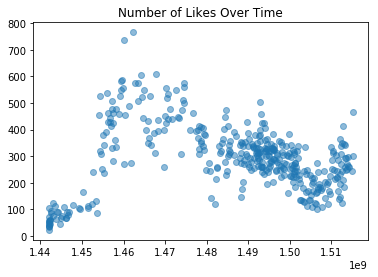

In [494]:
plt.title('Number of Likes Over Time')
plt.scatter(x=data_df['taken_at'], y=data_df['number_of_likes'], alpha=.5)

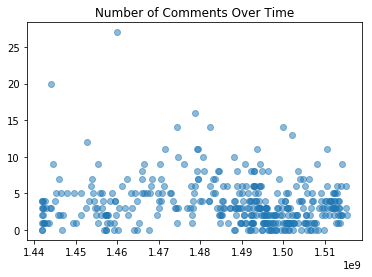

In [493]:
plt.title('Number of Comments Over Time')
plt.scatter(x=data_df['taken_at'], y=data_df['number_of_comments'], alpha=.5)

In [474]:

visit_data.head()

,Direct,Facebook,Instagram,Other,Search,total
2015-12-07,3.0,0.0,0.0,0.0,0.0,3.0
2015-12-08,8.0,0.0,0.0,0.0,1.0,9.0
2015-12-09,8.0,0.0,0.0,0.0,0.0,8.0
2015-12-10,29.0,160.0,0.0,0.0,0.0,189.0
2015-12-11,10.0,73.0,0.0,0.0,0.0,83.0


[]

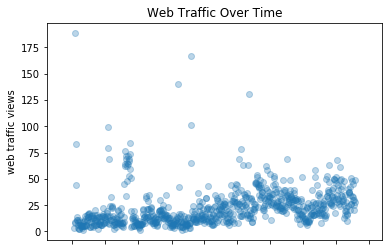

In [504]:
fig, ax = plt.subplots()
ax.scatter(x=dates, y= visit_data['total'], alpha=.3)
ax.set_ylabel('web traffic views')
ax.set_title('Web Traffic Over Time')
ax.set_xticklabels('')


In [479]:
dates = [pd.to_datetime(ind) for ind in visit_data.index]

[]

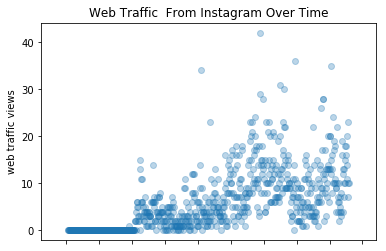

In [495]:
fig, ax = plt.subplots()
ax.scatter(x=dates, y= visit_data['Instagram'], alpha = .3)
ax.set_ylabel('web traffic views')
ax.set_title('Web Traffic  From Instagram Over Time')
ax.set_xticklabels('')



In [496]:
from pandas.tools.plotting import scatter_matrix

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129f22b0>,
      dtype=object)

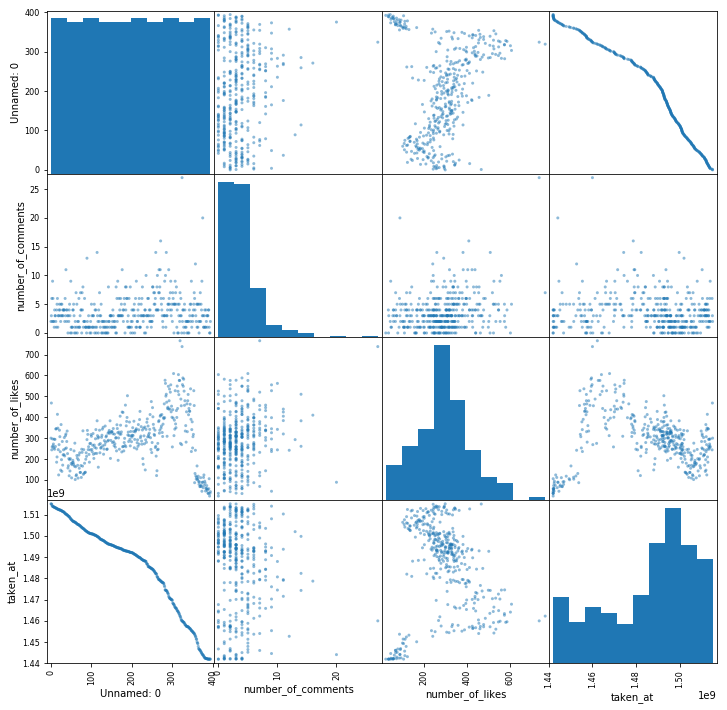

In [498]:
scatter_matrix(data_df, figsize = (12,12))

In [500]:
data_df.sort_values(by='taken_at', )

,Unnamed: 0,caption,commenters,comments,hashtags,number_of_comments,number_of_likes,people_tagged,taken_at,url
394,394,Handmade • Reversible • Customizable • bikinis...,"['cchunkins', 'tuskymusic']","['Get at me anytime ladies @driftbikinis', 'Do...","['#Cheerstobikinis', '#summerland']",2,44,"['sea__soul', 'thedriftcollective']",1441939494,http://www.instagram.com/p/7eVj7oAT0s/?taken-b...
393,393,Playing hooky with @gradeighboisvert_ // Grade...,[],[],[],0,36,['gradeighboisvert_'],1441939655,http://www.instagram.com/p/7eV3mQgT1O/?taken-b...
392,392,Soaking those last rays with @rhlockhart // #d...,[],[],"['#drift', '#driftbikinis']",0,23,"['rhlockhart', 'rhlockhart']",1441940186,http://www.instagram.com/p/7eW4cbAT23/?taken-b...
391,391,@rhlockhart in her new Blue Fish cheekies 🐟🐟🐟 ...,['kirstin.loves'],['Tell me to kick rocks em. Also I miss u'],['#drift'],1,106,"['rhlockhart', 'thedriftcollective', 'rhlockha...",1441940698,http://www.instagram.com/p/7eX24agT4M/?taken-b...
390,390,Cosmic Youth 〰 Olive\nin our limited edition B...,"['maksym_harris', 'millergan', 'thedriftcollec...","['@millergan', 'I want some of these em! Can y...",['#driftbyyou'],4,58,['thedriftcollective'],1441941661,http://www.instagram.com/p/7eZsfSAT6p/?taken-b...
389,389,"S p o t t e d • rule shaker, magic maker @sea_...","['alexjk91', 'thedriftcollective', 'thedriftco...","[""I'll take this in poster form 😂"", '😛 Miss ya...","['#Driftbikinis', '#Drift']",4,35,"['sea__soul', 'sea__soul']",1441942136,http://www.instagram.com/p/7eamaIgT72/?taken-b...
388,388,AMERICAN BADASS (++ many other styles) availab...,"['maya_j_k', 'jaxelaina', 'nicciblake']","['These are so adorable!!!!', '@nicciblake', '...",['#driftbikinis'],3,37,[],1441943340,http://www.instagram.com/p/7ec5c1gT-w/?taken-b...
387,387,Safari Blues // Periwinkle \nSaturday morning ...,"['jillis7', 'norahboisvert', 'the_wild_two']","['@emmajoan__ @eemiliaabediliaa', 'lovee this...",[],3,56,[],1442062834,http://www.instagram.com/p/7iA0KiAT5X/?taken-b...
386,386,Sliding into Saturday // #Driftbikinis #Drift,['sunnylooloo'],['Yeah baby! So good to see you last night😜'],['#Driftbikinis'],1,50,['sea__soul'],1442064656,http://www.instagram.com/p/7iESgXgT__/?taken-b...
385,385,So many new styles up on site 🎯 \n#drift #drif...,"['jrex601', 'sea__soul', 'ironwillwhit']","['Bootys', '@briglynn', 'Omg @driftbikinis do ...",['#drift'],3,73,[],1442149965,http://www.instagram.com/p/7knANuAT9b/?taken-b...
